In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
display(HTML("<style>.container { width:95% !important; }</style>"))
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
HTML('''
<script>
    function toggleCodeCells() {
      var codeCells = document.querySelectorAll('.jp-CodeCell');

      codeCells.forEach(function(cell) {
        var inputArea = cell.querySelector('.jp-InputArea');
        if (inputArea) {
          var currentDisplay = inputArea.style.display || getComputedStyle(inputArea).display;
          inputArea.style.display = currentDisplay === 'none' ? '' : 'none';
        }
      });
    }
</script>

<!-- Add a button to toggle visibility of input code cells -->
<button onclick="toggleCodeCells()">Toggle Code Cells</button>
''')

In [3]:
HTML('''
<button id="toggleButton" onclick="toggleQueue()">Toggle Queue</button>

<script>
  var queueHidden = false;

  function toggleQueue() {
    var queueElements = document.querySelectorAll('div.queue');

    for (var i = 0; i < queueElements.length; i++) {
      if (queueHidden) {
        queueElements[i].style.display = 'block';
      } else {
        queueElements[i].style.display = 'none';
      }
    }

    queueHidden = !queueHidden;
  }
</script>
''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

<div class="queue">
    Lecture 7 - 00:00
</div>

## 4.1 Bayesian inference and likelihood function

### 4.1.1 Recap and likelihood function

**Bayes' theorem**:

\begin{eqnarray}
  P(a \mid x) &=& \frac{I(a) \mathcal{L}(x \mid a)}{E(x)} \\
         &=& \frac{I(a) \mathcal{L}(x \mid a)}{\sum_i I(a_i) \mathcal{L}(x \mid a_i)} = \frac{I(a) \mathcal{L}(x \mid a)}{\int_a I(a) \mathcal{L}(x \mid a) \, {\rm d}a}
\end{eqnarray}

with:

- $x$: data
- $a$: parameter of the model
- $P$: posterior
- $I$: prior
- $L$: likelihood
- $E$: evidence

Knowing right hand side allows one to make inference on posterior probability, e.g., testing a hypothesis and fitting a model to data.

Consider multiple data points $x = \{x_i, x_2, \dots, x_N\}$ drawn from $\mathcal{L}(x_i \mid a)$ which depends on parameter $a$. Joint probability of data given the parameter is the product of probabilities:

\begin{eqnarray}
  \mathcal{L}(x \mid a) &=& \mathcal{L}(x_1 \mid a) \mathcal{L}(x_2 \mid a) \dots \mathcal{L}(x_N \mid a) \\
        &=& \prod \mathcal{L}(x_i \mid a)
\end{eqnarray}

Therefore:

\begin{equation}
  P(a \mid x) = \frac{I(a) \mathcal{L}(x \mid a)}{E(x)} = \frac{I(a) \prod \mathcal{L}(x_i \mid a)}{E(x)}
\end{equation}

<div class="queue">
    Lecture 7 - 00:10
</div>

### 4.1.2 Maximum a posteriori and maximum likelihood

Often difficult to know $E(x)$, but typically interested in relative value of $a$. Example: most likely outcome of $a$. We call it **maximum a posteriori (MAP)**.

MAP corresponds to $\widehat{a}_{\rm MAP}$ such that:

\begin{eqnarray}
  \widehat{a}_{\rm MAP} &=& \arg \max_{\substack a} P(a \mid x) &\equiv& \left[ \frac{\partial P(a \mid x)}{\partial a} \right]_{a = \widehat{a}} = 0\\
              &=& \arg \max_{\substack a} \ln P(a \mid x) &\equiv& \left[ \frac{\partial \ln P(a \mid x)}{\partial a} \right]_{a = \widehat{a}} = 0 \,.
\end{eqnarray}

Last line due to logarithms being a monotically increasing function of its argument. Using Bayes:

\begin{eqnarray}
  \ln P(a \mid x) &=& \ln \left( \frac{I(a) \prod \mathcal{L}(x_i \mid a)}{E(x)} \right) \\
             &=& \ln I(a) + \ln \prod \mathcal{L}(x_i \mid a) - \ln E(x) \\
             &=& \ln I(a) + \sum \ln \mathcal{L}(x_i \mid a) - \ln E(x) \,.
\end{eqnarray}

Very important: easier to deal with summations than products (e.g. numerical precision of computations). Therefore:

\begin{eqnarray}
  \left[ \frac{\partial \ln P(a \mid x)}{\partial a} \right]_{a = \widehat{a}} = \left[ \frac{\partial \ln I(a)}{\partial a} + \sum \frac{\partial \ln \mathcal{L}(x_i \mid a)}{\partial a} \right]_{a = \widehat{a}} = 0 \,.
\end{eqnarray}

Conclude: **for MAP the value of $E(x)$ is irrelevant**.

#### Maximum likelihood estimation (MLE)

Case of prior $I(a)$ independent of $a$:

\begin{eqnarray}
  \left[ \frac{\partial \ln P(a \mid x)}{\partial a} \right]_{a = \widehat{a}} = \left[ \sum \frac{\partial \ln \mathcal{L}(x_i \mid a)}{\partial a} \right]_{a = \widehat{a}} = 0 \,.
\end{eqnarray}

Called _flat priors_. Often the case if no reason to favour a value over another. MAP reduces to a **maximum likelihood estimation (MLE)**:

\begin{equation}
  \widehat{a}_{\rm MAP} = \arg \max_{\substack a} P(a \mid x) = \arg \max_{\substack a} \mathcal{L}(x \mid a) = \widehat{a}_{\rm MLE} \,.
\end{equation}

<div class="queue">
    Lecture 7 - 00:25
</div>

<div class="example">Example 1: maximum likelihood for a simple function</div>

Consider data sample $x = \{0.89, 0.03, 0.50, 0.36, 0.49\}$ drawn from $\mathcal{L}(x_i \mid a) = 1 + a(x_i - 0.5)$, with $x_i \in [0,1]$. Let us calculate $\ln \mathcal{L}$:

\begin{eqnarray}
  \ln \mathcal{L} = \sum_i \ln \mathcal{L}(x \mid a=+1.0) &=& \ln 1.39 + \ln 0.53 + \ln 1.0 + \ln 0.86 + \ln 0.99 = -0.47 \\
  \ln \mathcal{L} = \sum_i \ln \mathcal{L}(x \mid a=-1.0) &=& \ln 0.61 + \ln 1.47 + \ln 1.0 + \ln 1.14 + \ln 1.01 = 0.03 \\
\end{eqnarray}

Can try other values of $a$ and plot.

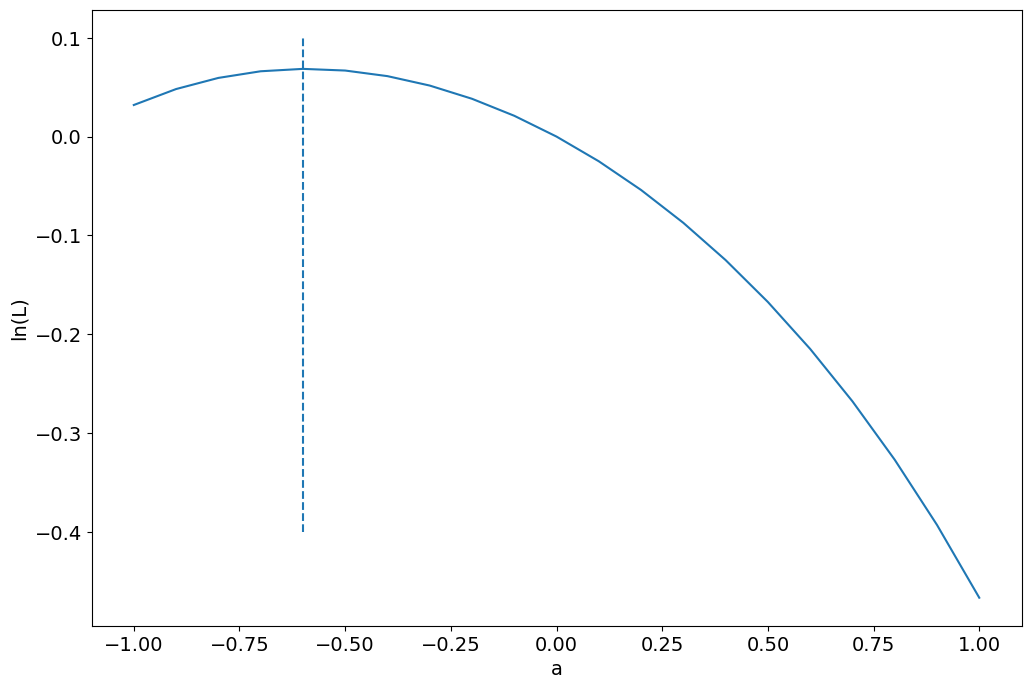

In [4]:
x = np.r_[0.89, 0.03, 0.50, 0.36, 0.49]

P = lambda a_: 1 + a_*(x - 0.5)

a = np.linspace(-1,1,21)
calc_ln_L = []
for ai in a:
    calc_ln_L.append( np.log(P(ai)).sum() )

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(a, calc_ln_L)
ax.vlines(-0.6, -0.4, 0.1, linestyles='--')
ax.set_xlabel('a')
ax.set_ylabel('ln(L)');

MLE for $\widehat{a} \approx -0.6$.

<div class="queue">
    Lecture 7 - 00:30
</div>

<div class="example">Example 2: MLE of a simple lifetime</div>

Study the decay of a radioactive nucleus. Probability of decay is:

\begin{equation}
  \mathcal{L}(t_i \mid \tau) = \frac{1}{\tau} e^{-t_i/\tau} \,,
\end{equation}

where $\tau$ is lifetime. Imagine N events with decay times $\left\{t_i\right\}$. What is the most likely $\widehat{\tau}$?

\begin{eqnarray}
  \frac{\partial \ln \mathcal{L}}{\partial \tau} &=& \sum \frac{\partial}{\partial \tau} \ln{\left( \frac{1}{\tau} e^{-t_i/\tau} \right)} \\
                                   &=& \sum \left( \frac{t_i}{\tau^2} - \frac{1}{\tau} \right) \,.
\end{eqnarray}

Setting to zero and solving for $\tau$ gives MLE of $\widehat{\tau}$:

\begin{equation}
  \widehat{\tau} = \frac{1}{N} \sum t_i \,.
\end{equation}

In this case MLE is sample mean, $\widehat{\tau} = \langle t \rangle$.

*Below is an histogram displaying 1000 decay times for a specific particle. The actual decay time for the model is $\tau = 2$, whereas the estimate using the above formula is $\hat{\tau} = 1.96$.*

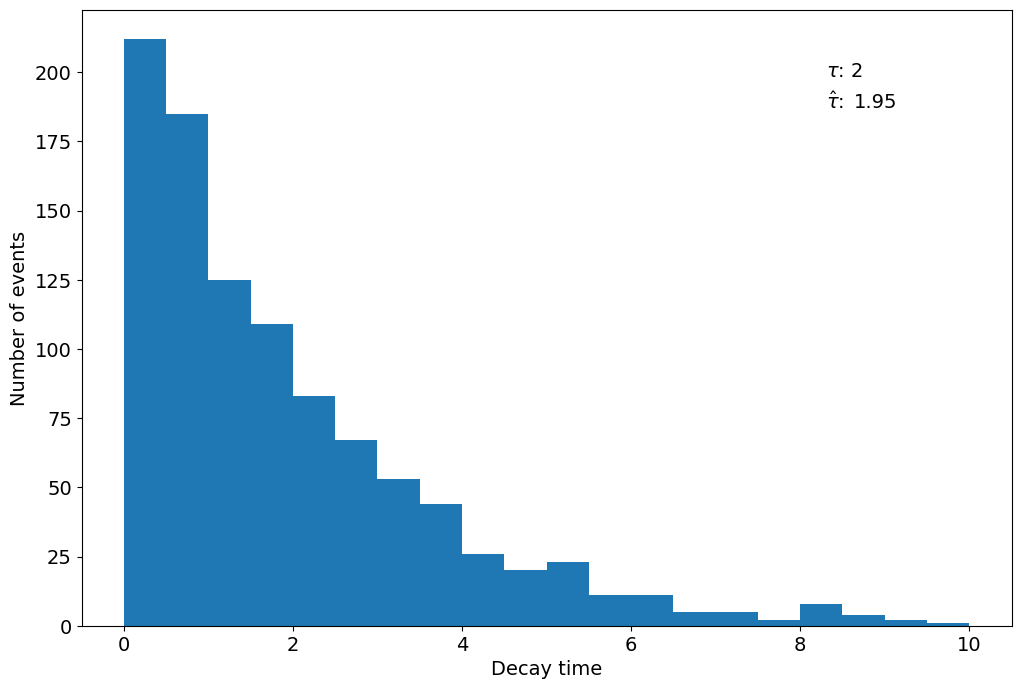

In [5]:
rng = np.random.default_rng(42)
tau = 2.
t = scipy.stats.expon.rvs(scale=tau, size=1000)
tau_fit = np.mean(t)

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(t, bins=20, range=[0,10])
ax.set_xlabel('Decay time')
ax.set_ylabel('Number of events')
ax.text(0.8, 0.9, r'$\tau}$: 2', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.text(0.8, 0.85, r'$\hat{\tau}$:', horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.text(0.83, 0.85, '{:.2f}'.format(tau_fit), horizontalalignment='left', verticalalignment='center', transform=ax.transAxes);

<div class="queue">
    Lecture 7 - 00:40 - Problem Sheet 2, Problem 1 (Bayesian M&M candies)
</div>

<div class="queue">
    Lecture 8 - 00:00
</div>

## 4.2 Maximum likelihood as an estimator

The decay lifetime allows us to draw some comparisons with the concept of estimator that we have seen in the previous chapter. For instance we can highlight two facts:

1. $\widehat{\mu}$ being equal to the sample mean suggests that the maximum likelihood is consistent
2. $\widehat{\sigma}$ being equal to the uncorrected standard deviation implies that the maximum likelihood is biased, but this vanishes in the limit of large $N$

Without going into the full details, we will state the following properties of MLEs [see Barlow, Chapter 5, for more details]:

> 1. Generally (though not strictly always) consistent
> 2. Generally biased, but this disappears in the limit of large $N$ for any consistent estimator
> 3. Generally invariant
> 4. Generally efficient

We therefore conclude that the MLE can be thought of as a good estimator in most cases. The invariance is in itself a very useful property.

<div class="queue">
    Lecture 8 - 00:10
</div>

### 4.2.1 Maximum likelihood invariance

We have stated that the invariance of the MLE without any justification. Let us assume that instead of considering a specific parameter $a$ we are interested in a function of that parameter $f(a)$. The invariance tells us that:

\begin{equation}
  \widehat{f(a)} = f(\widehat{a}) \,,
\end{equation}
which means that the MLE of $f(a)$ is the same as the MLE of $a$ itself.

It is possible to understand this principle by applying the chain rule:

\begin{equation}
  \left[ \frac{\partial \mathcal{L}}{\partial a} \right]_\widehat{a} = \left[ \frac{\partial \mathcal{L}}{\partial f(a)} \frac{\partial f(a)}{\partial a} \right]_\widehat{a} = 0 \,.
\end{equation}

Therefore, this implies that $\partial \mathcal{L}/\partial f(a) = 0$, unless $\partial f(a)/\partial a = 0$. The latter would happend if $f(a)$ does not depend on $a$, but this would be a trivial case.

_Note: in the decay lifetime, , however, that functions of unbiased estimators do not necessarily yield unbiased estimators._

<div class="queue">
    Lecture 8 - 00:15
</div>

### 4.2.2 Efficiency of the maximum likelihood

If we are interested to look at the efficiency of the maximum likelihood, we must consider the variance of a given estimator, $V(\widehat{a})$. It is in fact possible to derive a minimum bound, known as the **Rao-Cramér-Frechet (RCF) inequality** (also called **information inequality**):

\begin{equation}
  V(\widehat{a}) \ge \frac{\left( 1 + \frac{\partial b}{\partial a} \right)^2}{\left< -\frac{\partial^2 \ln \mathcal{L}}{\partial a^2} \right>} \,,
\end{equation}

where $b \equiv \left<\widehat{a}\right> - a$ is the bias. (_It is beyond the scope of this course to derive the RCF inequality, but more information can be found in Barlow, Chapter 5, and Cowan, Chapter 6._)

In the case of an unbiased estimator ($b = 0$), the RCF inequality becomes known as the **minimum variance bound (MVB)**:

\begin{equation}
  V(\widehat{a})_{\rm MVB} \ge \frac{1}{\left< -\frac{\partial^2 \ln \mathcal{L}}{\partial a^2} \right>} \,.
\end{equation}

<div class="queue">
    Lecture 8 - 00:20
</div>

<div class="example">Example 1: variance of a simple lifetime</div>

Recall the previous example in which we calculated the MLE of a simple lifetime experiment. The log-likelihood is given by:

\begin{equation}
  \ln \mathcal{L} = \sum \ln{\left( \frac{1}{\tau} e^{-t_i/\tau} \right)} \\
\end{equation}

Differentiative twice yields:

\begin{eqnarray}
  \frac{\partial^2 \ln \mathcal{L}}{\partial \tau^2} &=& \frac{N}{\tau^2} \left( 1 - \frac{2}{N \tau} \sum t_i \right) \\
  &=& \frac{N}{\tau^2} \left( 1 - \frac{2\widehat{\tau}}{\tau} \right) \,.
\end{eqnarray}

It is possible to show that $\widehat{\tau}$ is unbiased (i.e. $b = \langle\widehat{\tau}\rangle - \tau = 0$) so that the RCF inequality reduces to the MVB. We can therefore calculate the inequality:

\begin{eqnarray}
  V(\widehat{\tau}) &\ge& \frac{1}{\left< -\frac{N}{\tau^2} \left( 1 - \frac{2\widehat{\tau}}{\tau} \right) \right>} \\
  &\ge& \frac{1}{-\frac{N}{\tau^2} \left( 1 - \frac{2\left<\widehat{\tau}\right>}{\tau} \right)} \\
  &\ge& \frac{\tau^2}{N} \,,
\end{eqnarray}
where we have use the fact that $\widehat{\tau} = \tau$ in order to get to the last line.

In specific cases one can directly calculate the variance of the estimator. This is the case for this problem, and one finds that $V(\widehat{\tau}) = \frac{\tau^2}{N}$. This means that the MVB is in fact the variance itself, and thus the maximum likelihood is maximally efficient.

<div class="queue">
    Lecture 8 - 00:25
</div>

### 4.2.3 Variance on maximum likelihood estimators

The RCF inequality already gives us a minimum bound on the variance of a maximum likelihood estimator. As we mentioned earlier the bias on the estimator vanishes at large $N$ and so it is often justified to use the MVB instead. If we drop the inequality, as it is done with the uncertainty principle in quantum mechanics for instance, we can write the variance on the estimator as:

\begin{equation}
  V(\widehat{a}) = \sigma^2_\widehat{a} = \left[ \left( -\frac{\partial^2 \ln \mathcal{L}}{\partial a^2} \right)^{-1} \right]_\widehat{a} \,.
\end{equation}

With multiple parameters, the above equation can be generalised to the following relation:

\begin{equation}
  V(\widehat{a_{ij}}) = \left[ \left( -\frac{\partial^2 \ln \mathcal{L}}{\partial a_i \partial a_j} \right)^{-1}\right]_\widehat{a} \,.
\end{equation}

The right hand side of the above equation is typically called the **Fisher information matrix**, and its inverse (in the matrix sense) provides the covariance matrix of the estimated parameters.

One further way to understand the variance on MLE is to consider small variations around it. Let us expand the log-likelihod around the estimator using a Taylor series:

\begin{equation}
  \ln \mathcal{L}(a) = \ln \mathcal{L}(\widehat{a}) + \left[ \frac{\partial \ln \mathcal{L}}{\partial a} \right]_\widehat{a} (a - \widehat{a}) + \frac{1}{2} \left[ \frac{\partial^2 \ln \mathcal{L}}{\partial a^2} \right]_\widehat{a} (a - \widehat{a})^2 + \dots \,.
\end{equation}

By definition of $\widehat{a}$, $\ln \mathcal{L}(\widehat{a}) = \ln \mathcal{L}_{\rm max}$ and the first derivative is equal to zero. If we express the second derivative in terms of $\widehat{\sigma^2}_\widehat{a}$, we find that to second order:

\begin{equation}
  \ln \mathcal{L}(a) \approx \ln \mathcal{L}_{\rm max} - \frac{(a - \widehat{a})^2}{2 \sigma^2_\widehat{a}} \,.
\end{equation}

This is essentially the equation of a Gaussian with mean $\widehat{a}$ and standard deviation $\widehat{\sigma_\widehat{a}}$:

\begin{equation}
  \mathcal{L}(a) \approx \exp\left(\mathcal{L}_{\rm max}\right) \exp\left(\frac{-(a - \widehat{a})^2}{2 \sigma^2_\widehat{a}}\right) \,.
\end{equation}

Therefore:

\begin{equation}
  \ln \mathcal{L}(\widehat{a} \pm \sigma_\widehat{a}) = \ln \mathcal{L}_{\rm max} - \frac{1}{2} \,.
\end{equation}

We should highlight the important implications of what we have just derived:

> 1. The log-likelihood near the MLE can be approximated with a parabola, which means that the likelihood itself is a Gaussian in the MLE region.
> 2. The standard deviation on the MLE can be found by finding the value of the parameter for which the likelihood change by $\frac{1}{2}$ with respect to the MLE.

<div class="queue">
    Lecture 8 - 00:35
</div>

<div class="example">Example 1: maximum likelihood for a simple function</div>

Here we take again the earlier example of the maximum likelihood of a simple function and evaluate the uncertainty on the best-fit parameter by looking for the parameter value at which the log-likelihood decreases by $\frac{1}{2}$ with respect to the maximum value.

_Note: Sometimes, as is the case here, the log-likelihood function is not perfectly symmetrical. This means that the uncertainty needs to be evaluated for each side individually or otherwise approximated with a parabola if the problem was solved analytically._

Optimization terminated successfully.
         Current function value: -0.068503
         Iterations: 10
         Function evaluations: 20
ln_L_max: 0.068503
a_max: -0.59162
sigma_a_left: 1.2844
sigma_a_right: 1.5456


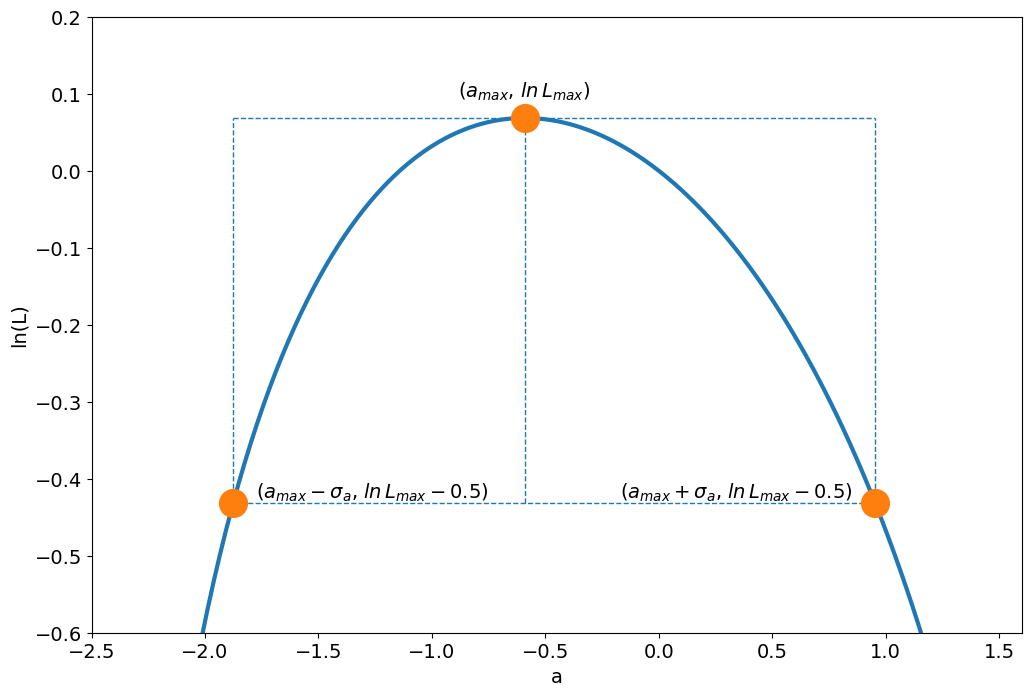

In [6]:
## The data
x = np.r_[0.89, 0.03, 0.50, 0.36, 0.49]

## The model
P = lambda a_: 1 + a_*(x - 0.5)
ln_L = lambda a_: np.log(P(a_)).sum()

## Finding the maximum likelihood
a_max = scipy.optimize.fmin(lambda a_: -ln_L(a_), -0.6)[0]
ln_L_max = ln_L(a_max)
print('ln_L_max: {:.5}'.format(ln_L_max))
print('a_max: {:.5}'.format(a_max))

## Finding the 1-sigma on the left
sigma_a_left = a_max - scipy.optimize.bisect(lambda a_: ln_L(a_)-ln_L_max+0.5, -2.0, a_max)
print('sigma_a_left: {:.5}'.format(sigma_a_left))

## Finding the 1-sigma on the left
sigma_a_right = -a_max + scipy.optimize.bisect(lambda a_: ln_L(a_)-ln_L_max+0.5, a_max, 1.0)
print('sigma_a_right: {:.5}'.format(sigma_a_right))

## Evaluating the model at a 
a = np.linspace(-2.1,1.2,241)
calc_ln_L = []
for ai in a:
    calc_ln_L.append( ln_L(ai) )

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(a, calc_ln_L, lw=3)
ax.vlines(a_max,               ln_L_max-0.5, ln_L_max, linestyles='--', lw=1)
ax.vlines(a_max-sigma_a_left,  ln_L_max-0.5, ln_L_max, linestyles='--', lw=1)
ax.vlines(a_max+sigma_a_right, ln_L_max-0.5, ln_L_max, linestyles='--', lw=1)
ax.hlines(ln_L_max, a_max-sigma_a_left, a_max+sigma_a_right, linestyles='--', lw=1)
ax.hlines(ln_L_max-0.5, a_max-sigma_a_left, a_max+sigma_a_right, linestyles='--', lw=1)
ax.plot([a_max, a_max-sigma_a_left, a_max+sigma_a_right], [ln_L_max, ln_L_max-0.5, ln_L_max-0.5], 'o', ms=20)
ax.text(a_max, ln_L_max+0.02, '($a_{max}$, $ln\,L_{max}$)', ha='center', va='bottom')
ax.text(a_max-sigma_a_left+0.1, ln_L_max-0.5, '($a_{max}-\sigma_a$, $ln\,L_{max}-0.5$)', ha='left', va='bottom')
ax.text(a_max+sigma_a_right-0.1, ln_L_max-0.5, '($a_{max}+\sigma_a$, $ln\,L_{max}-0.5$)', ha='right', va='bottom')
ax.set_xlabel('a')
ax.set_ylabel('ln(L)')
ax.set_xlim(-2.5,1.6)
ax.set_ylim(-0.6,0.2);

<div class="queue">
    Lecture 8 - 00:40 - Problem Sheet 2, Problem 2 (MLE of a Gaussian...)
</div>

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>